In [1]:
# DoBasicStats

In [1]:
from common_immunogit import *

2025-05-01 20:45:21,722 - INFO - Root path: /Users/guillaume.souede/PycharmProjects/immunogit
2025-05-01 20:45:21,724 - INFO - Directory structure set up successfully.


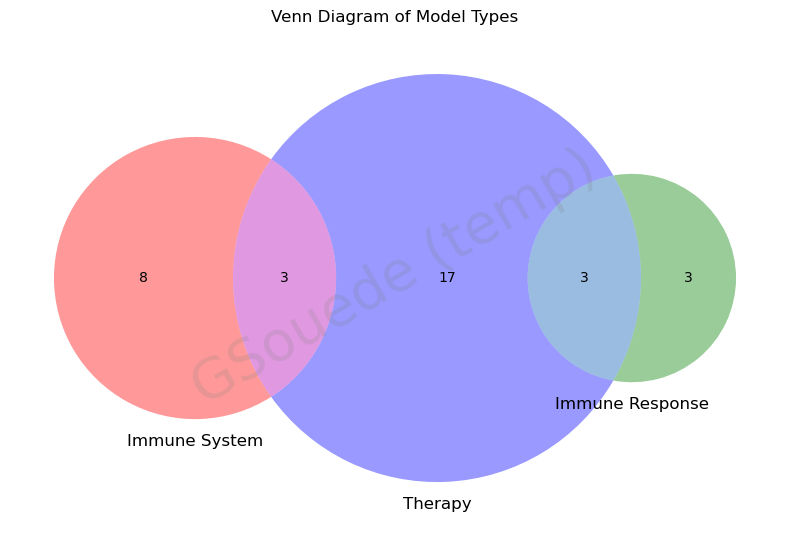

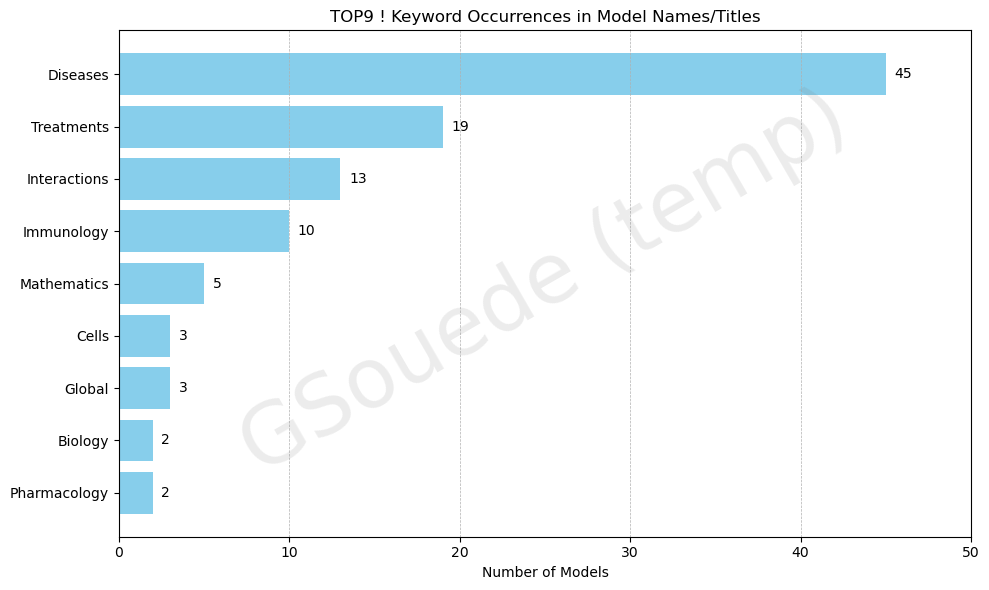

        Keyword  Count
3      Diseases     45
1    Treatments     19
2  Interactions     13
4    Immunology     10
6   Mathematics      5
0         Cells      3
8        Global      3
5       Biology      2
7  Pharmacology      2


In [12]:
import json
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
from collections import defaultdict

metadata_file_path = root_path / "metadata" / "model_metadata_tags.json"
keywords_file_path = root_path / "tmp" / "keywords.json"

title_keywords = ["immune system", "immune response", "therapy"]

with open(metadata_file_path, "r", encoding="utf-8") as f:
    model_metadata = json.load(f)

with open(keywords_file_path, "r", encoding="utf-8") as keywords_file:
    keywords_dict = json.load(keywords_file)

model_categories = defaultdict(set)

for model_id, entry in model_metadata.items():
    name = entry.get("name", "").lower()
    title = entry.get("publication", {}).get("title", "").lower()
    matched = False
    for keyword in title_keywords:
        if keyword in name or keyword in title:
            model_categories[keyword].add(model_id)
            matched = True
    if not matched:
        model_categories["OTHER"].add(model_id)

immune_system_set = model_categories["immune system"]
immune_response_set = model_categories["immune response"]
therapy_set = model_categories["therapy"]

plt.figure(figsize=(8, 6))
venn3([immune_system_set, immune_response_set, therapy_set],
      set_labels=("Immune System", "Immune Response", "Therapy"))
plt.title("Venn Diagram of Model Types")
plt.text(0.5, 0.5, 'GSouede (temp)', transform=plt.gca().transAxes,
         fontsize=40, color='gray', alpha=0.2,
         ha='center', va='center', rotation=30)
plt.tight_layout()
plt.show()

keyword_counts = []
for keyword, variants in keywords_dict.items():
    count = 0
    for model_id, entry in model_metadata.items():
        text = (entry.get("name", "") + " " + entry.get("publication", {}).get("title", "")).lower()
        if any(variant.lower() in text for variant in variants):
            count += 1
    keyword_counts.append((keyword, count))

import matplotlib.pyplot as plt
import pandas as pd

df_keywords = pd.DataFrame(keyword_counts, columns=["Keyword", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_keywords["Keyword"], df_keywords["Count"], color="skyblue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

plt.xlabel("Number of Models")
plt.title("TOP9 ! Keyword Occurrences in Model Names/Titles") # TOP10 not working
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.xticks(range(0, df_keywords["Count"].max() + 10, 10))
plt.text(0.5, 0.5, 'GSouede (temp)', transform=plt.gca().transAxes,
         fontsize=60, color='gray', alpha=0.15,
         ha='center', va='center', rotation=30)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(df_keywords)

